In [52]:
import tensorflow.compat.v1 as tf
import random
tf.disable_v2_behavior()
import tf_slim as slim
import sys
sys.path.append('/Users/naitik/Downloads/tf-models/slim')
%reload_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from nets import inception
from preprocessing import inception_preprocessing
session = tf.Session()
image_size = inception.inception_v3.default_image_size
def transform_img_fn(path_list):
    out = []
    for f in path_list:
        image_raw = tf.io.read_file(f)
        image = tf.image.decode_jpeg(image_raw, channels=3)
        image = inception_preprocessing.preprocess_image(image, image_size, image_size, is_training=False)
        out.append(image)
    return session.run([out])[0]
from datasets import imagenet
names = imagenet.create_readable_names_for_imagenet_labels()
processed_images = tf.placeholder(tf.float32, shape=(None, 299, 299, 3))
import os
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, _ = inception.inception_v3(processed_images, num_classes=1001, is_training=False, reuse=tf.AUTO_REUSE)
probabilities = tf.nn.softmax(logits)

checkpoints_dir = '/Users/naitik/Downloads/tf-models/slim/pretrained'
init_fn = slim.assign_from_checkpoint_fn(
    os.path.join(checkpoints_dir, 'inception_v3.ckpt'),
    slim.get_model_variables('InceptionV3'))
init_fn(session)
def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})


# Directory containing the images
image_directory = '/Users/naitik/Downloads/Summer Research Fellowship/cifar10/'

# Get a list of image filenames in the directory
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Select a random image filename
random_image_filename = random.choice(image_files)
# Create a list of image paths for the transform function
image_path = os.path.join(image_directory, random_image_filename)
# Transform the random image
random_image = transform_img_fn([image_path])[0]

image_directory = '/Users/naitik/Downloads/Summer Research Fellowship/cifar10/'

# Get a list of image filenames in the directory
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

def random_images():
    # Select a random image filename
    random_image_filename = random.choice(image_files)
    # Create a list of image paths for the transform function
    image_path = os.path.join(image_directory, random_image_filename)
    # Transform the random image
    random_image = transform_img_fn([image_path])[0]

    plt.imshow(random_image / 2 + 0.5, aspect='auto')
    plt.show()
    
    return random_image

def top_label_explanation(image, n):
    from lime import lime_image
    import time

    explainer = lime_image.LimeImageExplainer()
    tmp = time.time()
    explanation = explainer.explain_instance(image, predict_fn, top_labels=5, hide_color=0, num_samples=300)
    print(time.time() - tmp)

    from skimage.segmentation import mark_boundaries

    temp, mask = explanation.get_image_and_mask(explanation.top_labels[n], positive_only=False, num_features=10, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.show()



INFO:tensorflow:Restoring parameters from /Users/naitik/Downloads/tf-models/slim/pretrained/inception_v3.ckpt


In [43]:
# image = random_images()

# # Use the generated image for explanations
# top_label_explanation(image, 0)

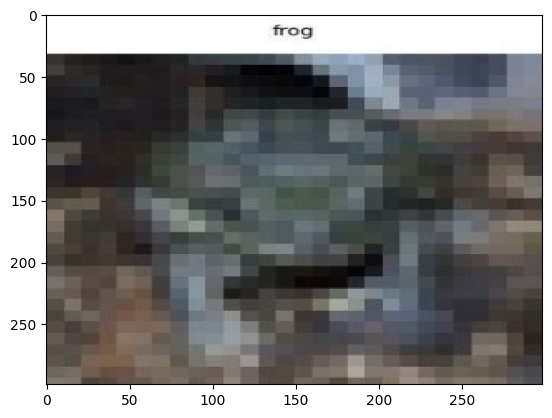

  0%|          | 0/300 [00:00<?, ?it/s]

11.704065084457397


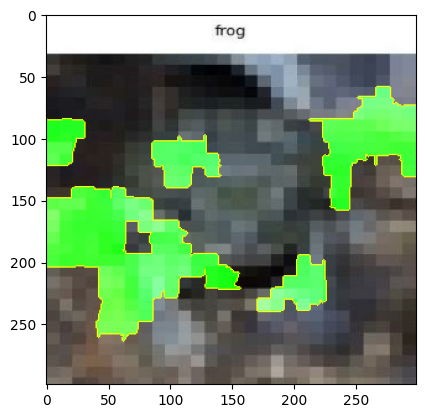

Provide feedback (👍 or 👎):  👍


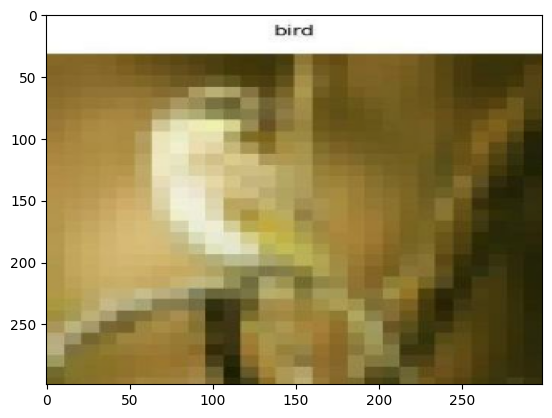

  0%|          | 0/300 [00:00<?, ?it/s]

12.031618118286133


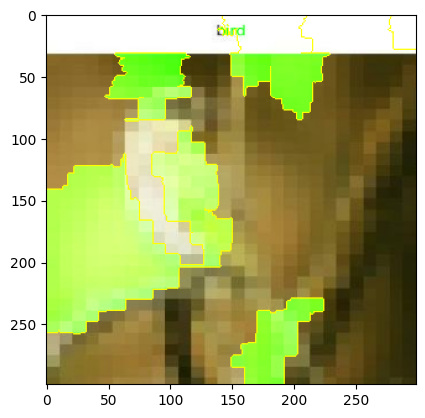

Provide feedback (👍 or 👎):  👍


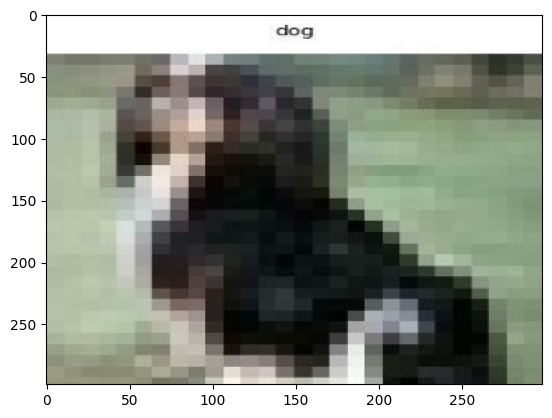

  0%|          | 0/300 [00:00<?, ?it/s]

11.441488027572632


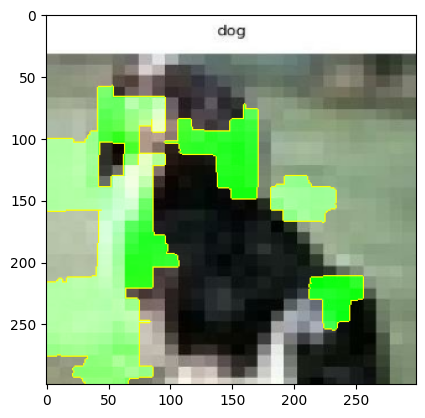

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.334991693496704


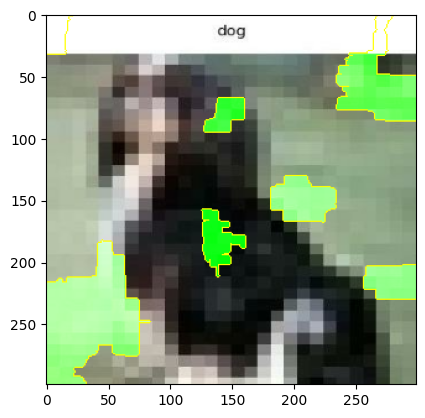

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.891642093658447


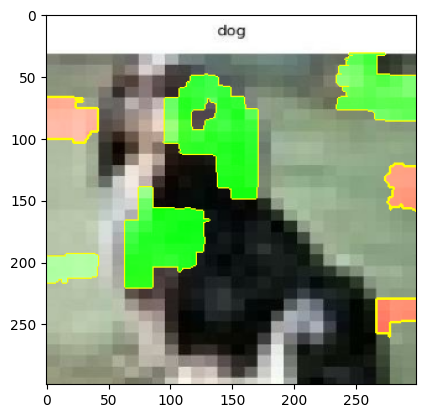

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.423612117767334


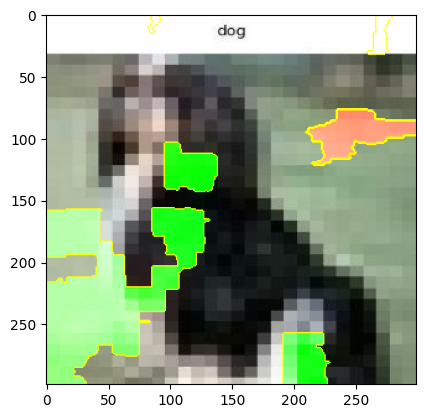

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.764642000198364


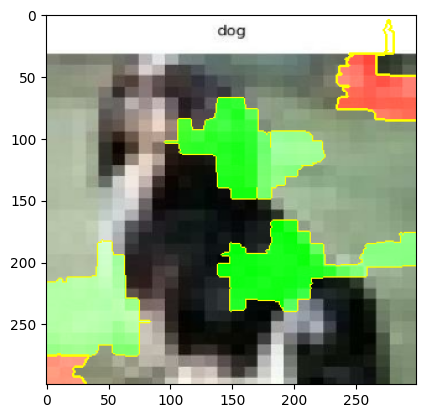

Provide feedback (👍 or 👎):  👍


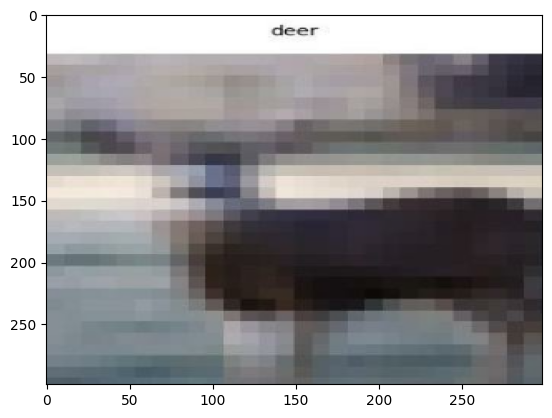

  0%|          | 0/300 [00:00<?, ?it/s]

11.530038118362427


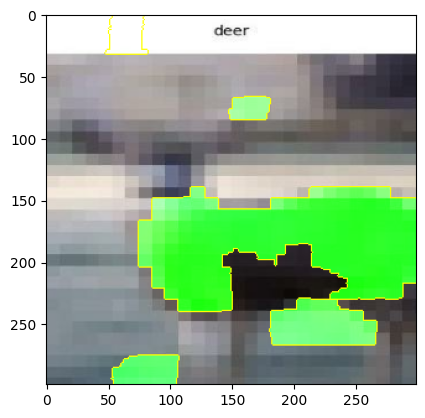

Provide feedback (👍 or 👎):  👍


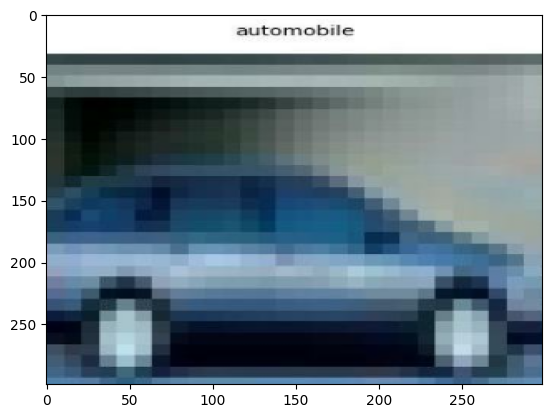

  0%|          | 0/300 [00:00<?, ?it/s]

12.52666425704956


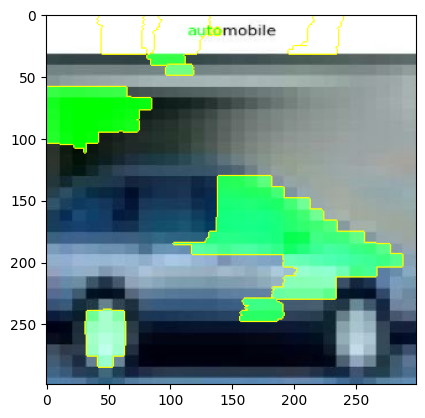

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.274767875671387


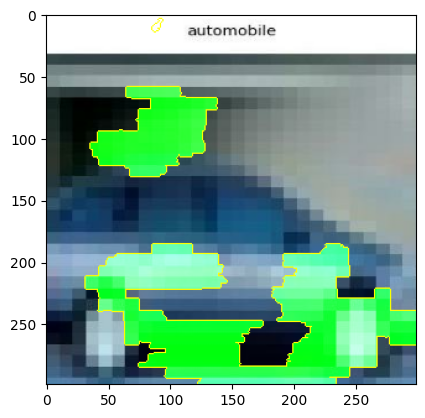

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.375445127487183


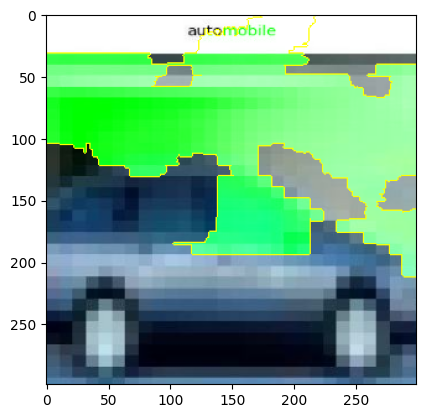

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.240225076675415


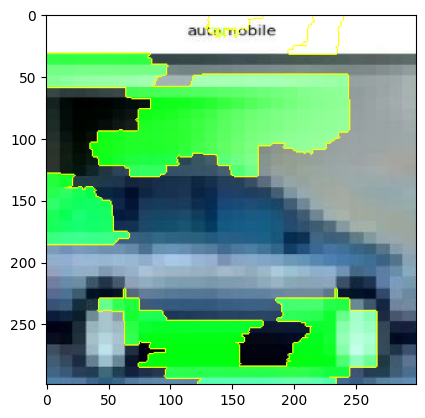

Provide feedback (👍 or 👎):  👎


  0%|          | 0/300 [00:00<?, ?it/s]

11.510656833648682


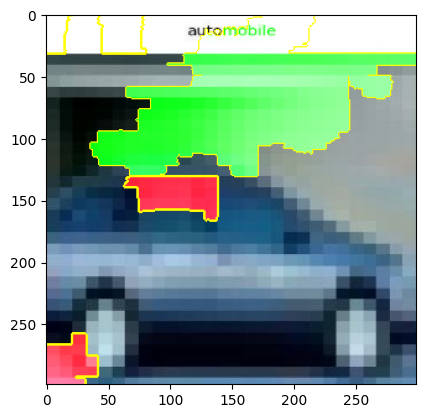

Provide feedback (👍 or 👎):  quit
Do you want to restart? (yes/no):  no


In [53]:
def main():
    while True:
        # Generate a random image
        image = random_images()

        # Get explanations for the generated image
        top_label_explanation(image, 0)

        user_input = input("Provide feedback (👍 or 👎): ")

        n = 1
        while user_input == "👎":
            top_label_explanation(image, n)
            user_input = input("Provide feedback (👍 or 👎): ")
            n += 1

        if user_input == "👍":
            continue  # Restart the loop

        restart = input("Do you want to restart? (yes/no): ")
        if restart.lower() != "yes":
            break

if __name__ == "__main__":
    main()